<h2>About this Project</h2>
<p>In this project, you will implement a kernelized SVM (support vector machine). You will generate linearly separable and non-linearly separable datasets, write functions to SVMs that support a variety of different kernels, and then visualize the decision boundary created.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
from helper import *
import matplotlib.pyplot as plt
import sys

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


### Generate and Visualize Data

Before we start, let's generate some data and visualize the training set. We are going to use the linearly separable data that we used in our previous project!

<IPython.core.display.Javascript object>


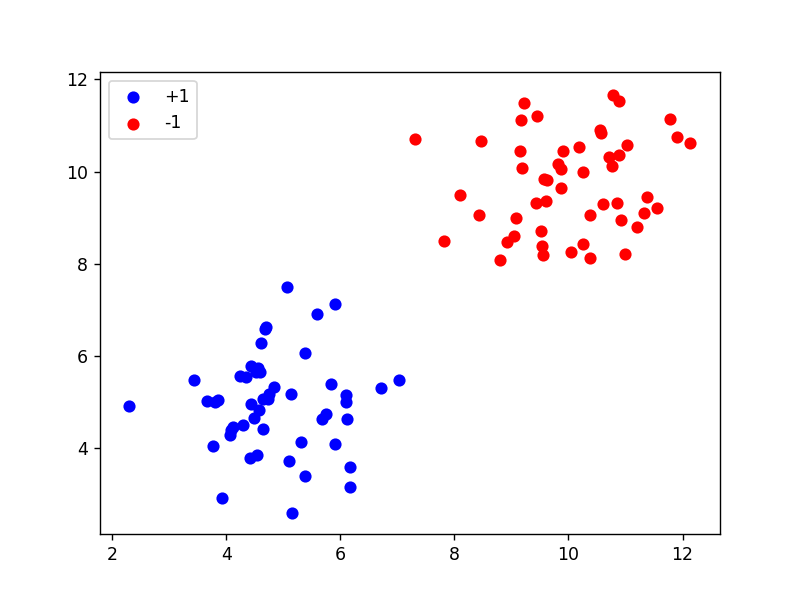

In [2]:
%matplotlib notebook
xTr,yTr = generate_data()
visualize_2D(xTr, yTr)

## Kernel SVM

In this assignment, you need to implement three functions <code>computeK</code> that computes the kernel function efficiently, <code>loss</code> that calculates the unconstrained kernelized hinge loss and <code>grad</code> that calculates the gradient of the loss with respect to $\mathbf{\beta}, b$. 

### Part One: Compute K [Graded]

In <code>computeK</code>, you are going to calcuate the values of different kernel functions given inputs `X` and `Z`. You will return $K = K(X,Z)$. $K_{ij} = k(\mathbf x_i, \mathbf z_j)$ where $k( \mathbf x_i, \mathbf z_j) = \phi(\mathbf x_i)^T\phi(\mathbf z_j)$. This function takes in the parameter `kerneltype` to decide which of the three different kernel functions to evaluate. To review, recall the following types of kernels:

- Linear: $K(X,Z) = X^TZ$
- Polynomial: $K(X, Z)=\left(X^{T} Z+1\right)^{d}$ where `kpar` = $d$
- RBF: $K(X,Z) = \exp\{-\frac{||X-Z||^2}{\sigma^2}\}$ where `kpar` = $\frac{1}{\sigma^2}$

<p><strong>Note:</strong> When calculating the RBF kernel, you can use the <code>l2distance(X, Z)</code> functions to calculate the pairwise l2 distance efficiently.</p>

In [3]:
def computeK(kerneltype, X, Z, kpar=1):
    """
    function K = computeK(kernel_type, X, Z)
    computes a matrix K such that Kij=k(x,z);
    for three different function linear, rbf or polynomial.
    
    Input:
    kerneltype: either 'linear','polynomial','rbf'
    X: n input vectors of dimension d (nxd);
    Z: m input vectors of dimension d (mxd);
    kpar: kernel parameter (inverse kernel width gamma in case of RBF, degree in case of polynomial)
    
    OUTPUT:
    K : nxm kernel matrix
    """
    assert kerneltype in ["linear","polynomial","rbf"], "Kernel type %s not known." % kerneltype
    assert X.shape[1] == Z.shape[1], "Input dimensions do not match"
    
    K = None
    
    # YOUR CODE HERE
    
    if kerneltype == "linear":
        K = np.dot(X,Z.T)

    if kerneltype == 'polynomial':
        K = (X@Z.T+1)**kpar
  
    if kerneltype == "rbf":
        dist = l2distance(X,Z)
        K = np.exp(-(dist**2)*kpar)
    return K
# xTr_test, yTr_test = generate_data(100)
# xTr_test2, yTr_test2 = generate_data(50)
# n, d = xTr_test.shape
# s1 = (computeK('rbf', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
# s2 = (computeK('polynomial', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
# s3 = (computeK('linear', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
# print(s1 and s2 and s3)

In [4]:
# These tests test whether your computeK() is implemented correctly

xTr_test, yTr_test = generate_data(100)
xTr_test2, yTr_test2 = generate_data(50)
n, d = xTr_test.shape

# Checks whether computeK compute the kernel matrix with the right dimension
def computeK_test1():
    s1 = (computeK('rbf', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s2 = (computeK('polynomial', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s3 = (computeK('linear', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is symmetric
def computeK_test2():
    k_rbf = computeK('rbf', xTr_test, xTr_test, kpar=1)
    s1 = np.allclose(k_rbf, k_rbf.T)
    k_poly = computeK('polynomial', xTr_test, xTr_test, kpar=1)
    s2 = np.allclose(k_poly, k_poly.T)
    k_linear = computeK('linear', xTr_test, xTr_test, kpar=1)
    s3 = np.allclose(k_linear, k_linear.T)
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is positive semi-definite
def computeK_test3():
    k_rbf = computeK('rbf', xTr_test2, xTr_test2, kpar=1)
    eigen_rbf = np.linalg.eigvals(k_rbf)
    eigen_rbf[np.isclose(eigen_rbf, 0)] = 0
    s1 = np.all(eigen_rbf >= 0)
    k_poly = computeK('polynomial', xTr_test2, xTr_test2, kpar=1)
    eigen_poly = np.linalg.eigvals(k_poly)
    eigen_poly[np.isclose(eigen_poly, 0)] = 0
    s2 = np.all(eigen_poly >= 0)
    k_linear = computeK('linear', xTr_test2, xTr_test2, kpar=1)
    eigen_linear = np.linalg.eigvals(k_linear)
    eigen_linear[np.isclose(eigen_linear, 0)] = 0
    s3 = np.all(eigen_linear >= 0)
    return (s1 and s2 and s3)

# Checks whether computeK compute the right kernel matrix with rbf kernel
def computeK_test4():
    k = computeK('rbf', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('rbf', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with polynomial kernel
def computeK_test5():
    k = computeK('polynomial', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('polynomial', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with linear kernel
def computeK_test6():
    k = computeK('linear', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('linear', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5


runtest(computeK_test1, 'computeK_test1')
runtest(computeK_test2, 'computeK_test2')
runtest(computeK_test3, 'computeK_test3')
runtest(computeK_test4, 'computeK_test4')
runtest(computeK_test5, 'computeK_test5')
runtest(computeK_test6, 'computeK_test6')

Running Test: computeK_test1 ... ✔ Passed!
Running Test: computeK_test2 ... ✔ Passed!
Running Test: computeK_test3 ... ✔ Passed!
Running Test: computeK_test4 ... ✔ Passed!
Running Test: computeK_test5 ... ✔ Passed!
Running Test: computeK_test6 ... ✔ Passed!


In [5]:
# Autograder test cell - worth 1 point
# runs computeK_test1

In [6]:
# Autograder test cell - worth 1 point
# runs computeK_test2

In [7]:
# Autograder test cell - worth 1 point
# runs computeK_test3

In [8]:
# Autograder test cell - worth 1 point
# runs computeK_test4

In [9]:
# Autograder test cell - worth 1 point
# runs computeK_test5

In [10]:
# Autograder test cell - worth 1 point
# runs computeK_test5

### Part Two: Compute Loss [Graded]

Now, you are going to implement the function <code>loss</code>. Note that the function signature of this function is slightly different from the previous assignment. Previously, we can pass in $\mathbf{w}$ to calculate the loss values. However, in the kernelized version of the loss, $\mathbf{w}$ is calculated as a linear combination of the training examples, so we need to pass the training set to the function. 

The following is an explanation of the theory that leads us to the loss expression.

Recall that we can express the solution as a linear combination of the training examples $ \{\phi(\mathbf{x}_1), \cdots, \phi(\mathbf{x}_n) \}$:
$$
    \begin{aligned}
    \mathbf{w} = \sum_{j = 1}^n \alpha_j y_j \phi(\mathbf{x}_j)
    \end{aligned}
$$

To simplify, we define $\beta_j = \alpha_j y_j$ and we can express the solution as: 
$$
    \begin{aligned}
    \mathbf{w} = \sum_{j = 1}^n \beta_j \phi(\mathbf{x}_j)
    \end{aligned}
$$

If we substitute the formulation above into our unconstrained regularized squared hinge loss, 
$$
    \begin{aligned}
    \min_{\mathbf{w},b}\underbrace{\mathbf{w}^T\mathbf{w}}_{l_{2} \text{ regularizer} } +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\mathbf{w}^T \mathbf{x}_i+b),0 \right ] ^2}_{ \text{squared hinge loss} }
    \end{aligned}
$$

we obtain: 

$$
\begin{aligned}
       \underbrace{\sum_{i = 1} ^n \sum_{j = 1}^n \beta_i  \beta_j \phi(\mathbf{x} _i)^T \phi(\mathbf{x}_j)}_{l_{2} \text{ regularizer}} +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\sum_{j = 1}^n \beta_j \phi(\mathbf{x}_j)^T \phi(\mathbf{x}_i)+b),0 \right ] ^ 2}_{\text{squared hinge loss}}     
\end{aligned}
$$
Now, if we replace all the $\phi(\mathbf{x} _i)^T \phi(\mathbf{x}_j)$ with $k(\mathbf{x}_i, \mathbf{x}_j)$, we obtained the "kernelized" hinge loss. 

$$
\begin{aligned}
      \min_{\beta_1,\cdots,\beta_n, b} \underbrace{\sum_{i = 1} ^n \sum_{j = 1}^n \beta_i \beta_j k(\mathbf{x} _i, \mathbf{x}_j)}_{l_{2} \text{ regularizer}} +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\sum_{j = 1}^n \beta_j k(\mathbf{x}_j, \mathbf{x}_i)+b),0 \right ] ^ 2}_{\text{squared hinge loss}}
\end{aligned}
$$

The expression above seems a little bit unweildy, so we are going to simplify the expression again. First, we will simplfy the $l_{2}$ regularizer. Define $\mathbf{\beta} = [\beta_1, \cdots, \beta_n]^T$ and $K_{train}$ to be the kernel matrix calculated on the training set, namely, the (i, j)-th entry of $K_{train}$ is $k(\mathbf{x} _i, \mathbf{x}_j)$. It is easy to verify that the $l_{2}$ regularizer can be expressed as the quadratic form  

$$
    \sum_{i = 1} ^n \sum_{j = 1}^n \beta_i \beta_j k(\mathbf{x} _i, \mathbf{x}_j) = \mathbf{\beta}^T K_{train} \mathbf{\beta}
$$

Now, let's simplify the squared hinge loss. To start, we define $K_{train}[i]$ as the i-th row of $k_{train}$ expressed as a column vector. Now, the summation term within the hinge loss can be expressed as: 

$$
    \sum_{ j = 1}^n \beta_j k(\mathbf{x}_j, \mathbf{x}_i) = \mathbf{\beta}^T K_{train}[i]
$$

Combining the two simplifications we have, we arrive at the following expression for the loss function: 
$$
\begin{aligned}
      \min_{\mathbf{\beta}, b} \underbrace{\mathbf{\beta}^T K_{train} \mathbf{\beta}}_{l_{2}  \text{ regularizer}} +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\mathbf{\beta}^T K_{train}[i]+b),0 \right ] ^ 2}_{\text{squared hinge loss}}
\end{aligned}
$$

After we minimize this expression and have found a good $\beta$ that works on the kernel generated from the training data, $K_{train}$, we can test using our $\beta$ and calculating the loss against testing data: 

$$
\begin{aligned}
      \min_{\mathbf{\beta}, b} \underbrace{\mathbf{\beta}^T K_{train} \mathbf{\beta}}_{l_{2}  \text{ regularizer}} +  C\  \sum_{i=1}^{n}\underbrace{\max\left [ 1-y_{i}(\mathbf{\beta}^T K_{test}[i]+b),0 \right ] ^ 2}_{\text{squared hinge loss}}
\end{aligned}
$$

Note that the loss function we have above is very similar to the vanilla linear SVM, the differences are: 

1. Instead of $\mathbf{w}$, we have $\mathbf{\beta}$
2. The $l_{2}$ regularizer $\mathbf{w}^T \mathbf{w} = \mathbf{w}^T I \mathbf{w}$ is changed to $\mathbf{\beta}^T K_{train} \mathbf{\beta}$ to account for using $\mathbf{\beta}$ instead of $\mathbf{w}$
3. The inner product $\mathbf{w}^T \mathbf{x}_i$ in the hinge loss is changed to $\mathbf{\beta}^T K_{train}[i]$

This is useful because we never need to explicitly calculate $\phi(\mathbf x_i)$, which can be exponential in size, or in the case of RBF, have an infinite number of elements. On the other hand, $K$ will be a $m x n$ matrices that encapsulates all the data you would gain from $\phi$. 

Note that in the following code you are passing in both training data (`xTr`, `yTr`) and testing data (`xTe`, `yTr`) to calculate two kernels, `kernel_train` and `kernel_test` respectively. Unfortunately, when we're training an algorithm, we don't have access to test data! That would make the test data a very poor evaluator of the performance of the algorithm. This function is written so that passing **training data** into the parameters `xTe` and `yTe` will train the SVM on training data to find the best betas. During testing, passing in **test data** into those variables can be used to evaluate how good your algorithm is.

In [11]:
def loss(beta, b, xTr, yTr, xTe, yTe, C, kerneltype, kpar=1):
    """
    INPUT:
    beta : n dimensional vector that stores the linear combination coefficient
    xTr   : nxd dimensional matrix (training set, each row is an input vector)
    yTr   : n   dimensional vector (training label, each entry is a label)
    b     : scalar (bias)
    xTe   : mxd dimensional matrix (test set, each row is an input vector)
    yTe   : m dimensional vector (test label, each entry is a label)
    C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
    kerneltype: either 'linear','polynomial','rbf'
    kpar  : kernel parameter (inverse kernel width gamma in case of RBF, degree in case of polynomial)
    
    OUTPUTS:
    loss     : the total loss obtained with (beta, xTr, yTr, b) on xTe and yTe (scalar)
    """
    
    loss_val = 0.0
    # compute the kernel values between xTr and xTr 
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)
    # compute the kernel values between xTe and xTr
    kernel_test = computeK(kerneltype, xTe, xTr, kpar)
    
    # YOUR CODE HERE
    loss1 = beta.T@kernel_train@beta
    loss2 = C*np.sum(np.maximum(1- yTr*(beta.T@kernel_train + b),0)**2) # C*np.sum(np.maximum((1 - yTr(beta.T@kernel_train + b), 0))**2)
    loss_val = loss1 + loss2
    

   # raise NotImplementedError()
    return loss_val
# xTr_test, yTr_test = generate_data()
# n, d = xTr_test.shape
# beta = np.zeros(n)
# b = np.zeros(1)
# loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
# print(np.isscalar(loss_val))

In [12]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    beta = np.zeros(n)
    b = np.zeros(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return np.isscalar(loss_val)


# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

loss_test3()

# Check whether you implement square hinge loss correctly
def loss_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test5():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

runtest(loss_test1,'loss_test1')
runtest(loss_test2,'loss_test2')
runtest(loss_test3,'loss_test3')
runtest(loss_test4,'loss_test4')
runtest(loss_test5,'loss_test5')
runtest(loss_test6,'loss_test6')

Running Test: loss_test1 ... ✔ Passed!
Running Test: loss_test2 ... ✔ Passed!
Running Test: loss_test3 ... ✔ Passed!
Running Test: loss_test4 ... ✔ Passed!
Running Test: loss_test5 ... ✔ Passed!
Running Test: loss_test6 ... ✔ Passed!


In [13]:
# Autograder test cell - worth 1 point
# runs loss_test1

In [14]:
# Autograder test cell - worth 1 point
# runs loss test2

In [15]:
# Autograder test cell - worth 1 point
# runs loss test3beta @ kernel_train

In [16]:
# Autograder test cell - worth 1 point
# runs loss test4

In [17]:
# Autograder test cell - worth 1 point
# runs loss test5

In [18]:
# Autograder test cell - worth 1 point
# runs loss test6

### Part Three: Compute Gradient [Graded]

Now, you will need to implement function `grad`, that computes the gradient of the loss function, similarly to what you needed to do in the Linear SVM project. This function has the same input parameters as `loss` and requires the gradient with respect to $\beta$ (`beta_grad`) and $b$ (`bgrad`). Remember that the squared hinge loss is calculated with $K_{train}$ when training, and $K_{test}$ when testing. In the code, you can represent this by using the variables associated with testing (i.e. `xTe`, `yTe`, and `k_test`), since they will contain training data if you are training the SVM.

Recall the expression for loss from above. First we take the derivative with respect to $\beta$:
$$
      \frac{\partial \mathcal L}{\partial \mathbf \beta} =  2{K_{train} \mathbf{\beta}} +  C\  \sum_{i=1}^{n}{ 2 \max\left [ 1-y_{i}(\mathbf{\beta}^T K_{test}[i]+b),0 \right ] (-y_i K_{test}[i])}
$$
Then, with respect to $b$:
$$
      \frac{\partial \mathcal L}{\delta b} =  C\  \sum_{i=1}^{n}{ 2 \max\left [ 1-y_{i}(\mathbf{\beta}^T K_{test}[i]+b),0 \right ] (-y_i)}
$$


In [30]:
def grad(beta, b, xTr, yTr, xTe, yTe, C, kerneltype, kpar=1):
    """
    INPUT:
    beta : n dimensional vector that stores the linear combination coefficient
    xTr   : nxd dimensional matrix (training set, each row is an input vector)
    yTr   : n   dimensional vector (training label, each entry is a label)
    b     : scalar (bias)
    xTe   : mxd dimensional matrix (test set, each row is an input vector)
    yTe   : m dimensional vector (test label, each entry is a label)
    C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
    kerneltype: either 'linear','polynomial','rbf'
    kpar  : kernel parameter (inverse kernel width gamma in case of RBF, degree in case of polynomial)
    
    
    OUTPUTS:
    beta_grad :  n dimensional vector (the gradient of the hinge loss with respect to the alphas)
    bgrad :  constant (the gradient of he hinge loss with respect to the bias, b)
    """
    
    n, d = xTr.shape
    
    beta_grad = np.zeros(n)
    bgrad = np.zeros(1)
    
    # compute the kernel values between xTr and xTr 
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)
    # compute the kernel values between xTe and xTr
    kernel_test = computeK(kerneltype, xTe, xTr, kpar)
    
    # YOUR CODE HERE

    beta_grad = 2*kernel_test@beta + C *np.sum(2*np.maximum(1- yTe*(beta.T@kernel_test + b),0)*(-yTe*kernel_test))
    
    bgrad = C *np.sum(2*np.maximum(1- yTe*(beta.T@kernel_test + b),0)*-yTe)
    
    print(beta_grad.shape)
    print(bgrad.shape)
    
    
    #raise NotImplementedError()
    return beta_grad, bgrad
xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape
beta = np.zeros(n)
b = np.random.rand(1)
beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 1, 'rbf')
beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 1, 'rbf')
print((np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5), (np.linalg.norm(bgrad - bgrad_grader) < 1e-5))


(100,)
()
False True


In [31]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Checks whether grad returns a tuple
def grad_test1():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    out = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    return len(beta_grad) == n and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 1, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 1, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

runtest(grad_test1, 'grad_test1')
runtest(grad_test2, 'grad_test2')
runtest(grad_test3, 'grad_test3')
runtest(grad_test4, 'grad_test4')
runtest(grad_test5, 'grad_test5')

Running Test: grad_test1 ... (100,)
()
✔ Passed!
Running Test: grad_test2 ... (100,)
()
✔ Passed!
Running Test: grad_test3 ... (100,)
()
✔ Passed!
Running Test: grad_test4 ... (100,)
()
✖ Failed!
 The output of your function does not match the expected output. Check your code and try again.
Running Test: grad_test5 ... (100,)
()
✖ Failed!
 The output of your function does not match the expected output. Check your code and try again.


In [21]:
# Autograder test cell - worth 1 point
# runs grad test1

In [ ]:
# Autograder test cell - worth 1 point
# runs grad test2

In [ ]:
# Autograder test cell - worth 1 point
# runs grad test3

In [ ]:
# Autograder test cell - worth 1 point
# runs grad test4

In [ ]:
# Autograder test cell - worth 1 point
# runs grad test5

## Test the Kernelized Algorithm

Using the cell below, you can call the optimization routine that we have implemented for you to see the final loss of your model. 

In [ ]:
beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000, kerneltype='linear', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))

If everything is implemented correctly, you should be able to get a training error of zero when you run the following cell.

In [ ]:
svmclassify = lambda x: np.sign(computeK('linear', x, xTr, 1).dot(beta_sol) + bias_sol)

predsTr=svmclassify(xTr)
trainingerr=np.mean(np.sign(predsTr)!=yTr)
print("Training error: %2.4f" % trainingerr)

<h3>Visualize the Decision Boundary</h3>

Also, when you visualize the classifier, you should see a max margin separator.

In [ ]:
%matplotlib notebook
visclassifier(svmclassify, xTr, yTr)

Let's visualize a different kind of nonlinear data, a spiral dataset.

In [ ]:
xTr_spiral,yTr_spiral,xTe_spiral,yTe_spiral = spiraldata()

%matplotlib notebook
visualize_2D(xTr_spiral, yTr_spiral)

Since the dataset is nonlinear, we are going to use the rbf kernel.

In [ ]:
beta_sol_spiral, bias_sol_spiral, final_loss_spiral = minimize(objective=loss, grad=grad, xTr=xTr_spiral, yTr=yTr_spiral, C=100, kerneltype='rbf', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss_spiral))

If you do everything correctly, your training error and test error should both be zero!

In [ ]:
svmclassify_spiral = lambda x: np.sign(computeK('rbf', xTr_spiral, x, 1).transpose().dot(beta_sol_spiral) + bias_sol_spiral)

predsTr_spiral = svmclassify_spiral(xTr_spiral)
trainingerr_spiral = np.mean(predsTr_spiral != yTr_spiral)
print("Training error: %2.4f" % trainingerr_spiral)

predsTe_spiral = svmclassify_spiral(xTe_spiral)
testerr_spiral = np.mean(predsTe_spiral != yTe_spiral)
print("Test error: %2.4f" % testerr_spiral)

Now, let's visualize the classifier on the spiral dataset!

In [ ]:
visclassifier(svmclassify_spiral, xTr_spiral, yTr_spiral)

<h3>Interactive Demo</h3>

Running the code below will create an interactive window where you can click to add new data points to see how a kernel SVM with RBF kernel will respond. There may be a significant delay between clicks.

In [ ]:
Xdata = []
ldata = []
svmC=10;

fig = plt.figure()
details = {
    'ax': fig.add_subplot(111), 
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def vis2(fun,xTr,yTr):
    yTr = np.array(yTr).flatten()
    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classvals = np.unique(yTr)
    res=150
    xrange = np.linspace(0,1,res)
    yrange = np.linspace(0,1,res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
    testpreds = fun(xTe)
    Z = testpreds.reshape(res, res)
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
           )
    plt.show()


def generate_onclick(Xdata, ldata):    
    global details
    def onclick(event):
        if event.key == 'shift': 
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1    
        pos = np.array([event.xdata, event.ydata])
        ldata.append(label)
        Xdata.append(pos)
        
        X=np.array(Xdata)
        Y=np.array(ldata)
        beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=X, yTr=Y, C=svmC, kerneltype='rbf', kpar=1)
        svmclassify_demo = lambda x: np.sign(computeK('rbf', X, x, 1).transpose().dot(beta_sol) + bias_sol)
        vis2(svmclassify_demo, X, Y)    
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
plt.show()